- t $\theta$ 平角 经度 (-180,180)
- p $\phi$   仰角 纬度 (-90,90)

## 经纬度转为二维空间坐标

In [2]:
import numpy as np

In [3]:
S=0.75

def meshgrid(xs,ys):
    xs,ys=np.meshgrid(xs,ys)
    xs=xs.flatten()
    ys=ys.flatten()
    return xs,ys

def sph_c2d(ts,ps):
    """球型坐标转2D坐标"""
    xs=[]
    ys=[]
    for t,p in zip(ts,ps):
        x=t*np.cos(p*S)
        y=p
        xs.append(x)
        ys.append(y)
    xs=np.array(xs)
    ys=np.array(ys)
    return xs,ys

def c2d_sph(xs,ys):
    """2D坐标转球型坐标"""
    ts=[]
    ps=[]
    for i,y in enumerate(ys):
        x=xs[i]
        # print(x,y)
        p=y
        t=x/(np.cos(S*p))
        if t> np.pi:continue
        if t<-np.pi:continue
        ts.append(t)
        ps.append(p)
    ts=np.array(ts)
    ps=np.array(ps)
    return ts,ps

def sph_c3d(ts,ps,r=1):
    """球型坐标转3D坐标"""
    xs=np.cos(ps)*np.cos(ts)*r
    ys=np.cos(ps)*np.sin(ts)*r
    zs=np.sin(ps)*r
    return xs,ys,zs

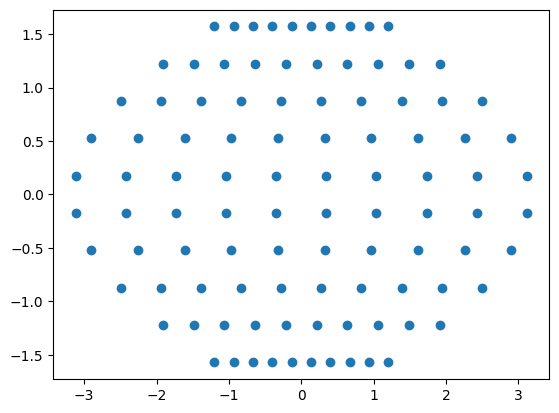

In [4]:
import numpy as np
import matplotlib.pyplot as plt


tr=np.linspace(-np.pi,np.pi,10)
pr=np.linspace(-np.pi/2,np.pi/2,10)
ts,ps=meshgrid(tr,pr)
xs,ys=sph_c2d(ts,ps)

plt.scatter(xs,ys)
plt.show()

## 二维空间坐标转为经纬度

-3.126229638874136 3.126229638874136
-1.5707963267948966 1.5707963267948966


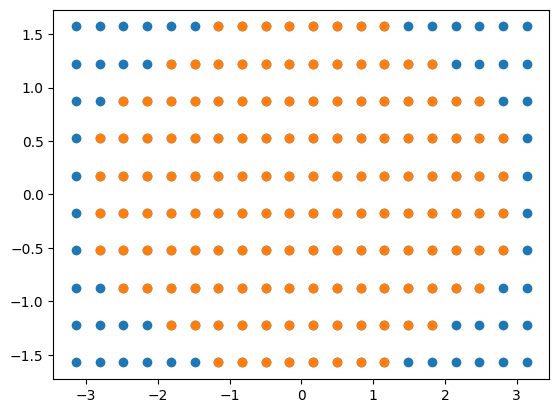

In [61]:
xr=np.linspace(-np.pi,np.pi,20)
yr=np.linspace(-np.pi/2,np.pi/2,10)
xs,ys=meshgrid(xr,yr)
plt.scatter(xs,ys)
ts,ps=c2d_sph(xs,ys)
xs,ys=sph_c2d(ts,ps)
plt.scatter(xs,ys)
print(min(ts),max(ts))
print(min(ps),max(ps))

## 经纬度转为三维空间坐标

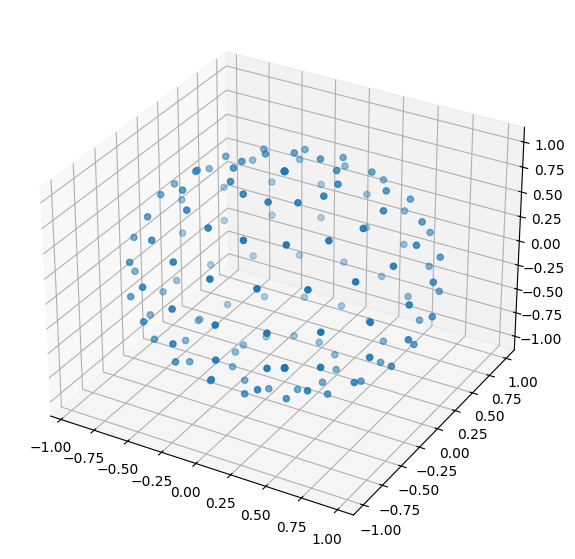

In [66]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
xs,ys,zs=sph_c3d(ts,ps)
ax.scatter(xs,ys,zs)